In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
avengers = pd.read_csv("avengers.csv", encoding = "latin-1")

In [3]:
avengers.head()

,URL,Name/Alias,Appearances,Current?,Gender,Probationary Introl,Full/Reserve Avengers Intro,Year,Years since joining,Honorary,...,Return1,Death2,Return2,Death3,Return3,Death4,Return4,Death5,Return5,Notes
0,http://marvel.wikia.com/Henry_Pym_(Earth-616),"Henry Jonathan ""Hank"" Pym",1269,YES,MALE,NaN,Sep-63,1963,52,Full,...,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Merged with Ultron in Rage of Ultron Vol. 1. A...
1,http://marvel.wikia.com/Janet_van_Dyne_(Earth-...,Janet van Dyne,1165,YES,FEMALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Secret Invasion V1:I8. Actually was se...
2,http://marvel.wikia.com/Anthony_Stark_(Earth-616),"Anthony Edward ""Tony"" Stark",3068,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Death: ""Later while under the influence of Imm..."
3,http://marvel.wikia.com/Robert_Bruce_Banner_(E...,Robert Bruce Banner,2089,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Dies in Ghosts of the Future arc. However ""he ..."
4,http://marvel.wikia.com/Thor_Odinson_(Earth-616),Thor Odinson,2402,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,YES,NO,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Fear Itself brought back because that'...


In [4]:
avengers["Year"].describe()

count     173.000000
mean     1988.445087
std        30.374669
min      1900.000000
25%      1979.000000
50%      1996.000000
75%      2010.000000
max      2015.000000
Name: Year, dtype: float64

In [5]:
avengers = avengers[avengers["Year"]>= 1960]

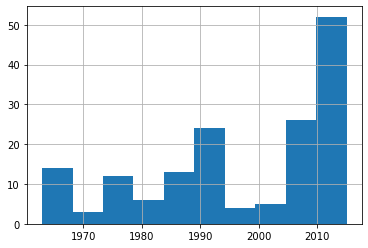

In [7]:
avengers['Year'].hist()
plt.show()

In [9]:
avengers.head()

,URL,Name/Alias,Appearances,Current?,Gender,Probationary Introl,Full/Reserve Avengers Intro,Year,Years since joining,Honorary,...,Return1,Death2,Return2,Death3,Return3,Death4,Return4,Death5,Return5,Notes
0,http://marvel.wikia.com/Henry_Pym_(Earth-616),"Henry Jonathan ""Hank"" Pym",1269,YES,MALE,NaN,Sep-63,1963,52,Full,...,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Merged with Ultron in Rage of Ultron Vol. 1. A...
1,http://marvel.wikia.com/Janet_van_Dyne_(Earth-...,Janet van Dyne,1165,YES,FEMALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Secret Invasion V1:I8. Actually was se...
2,http://marvel.wikia.com/Anthony_Stark_(Earth-616),"Anthony Edward ""Tony"" Stark",3068,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Death: ""Later while under the influence of Imm..."
3,http://marvel.wikia.com/Robert_Bruce_Banner_(E...,Robert Bruce Banner,2089,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Dies in Ghosts of the Future arc. However ""he ..."
4,http://marvel.wikia.com/Thor_Odinson_(Earth-616),Thor Odinson,2402,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,YES,NO,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Fear Itself brought back because that'...


# Consolidating Deaths

In [8]:
def deaths(series):
    death_count = 0
    cols = ["Death1", "Death2", "Death3", "Death4", "Death5"]
    counts = 0
    for i in cols:
        if series[i] == "NO" or pd.isnull(series[i]):
            continue
        else:
            counts+=1
    return counts
    

In [9]:
avengers["Deaths"] = avengers.apply(deaths, axis = 1)

In [10]:
cols = ["Death1", "Death2", "Death3", "Death4", "Death5"]
counts = 0
for i in cols:
    if avengers.iloc[100][i] == "NO" or pd.isnull(avengers.iloc[100][i]):
        continue
    else:
        counts+=1
counts

0

In [11]:
avengers.shape

(159, 22)

In [12]:
avengers.iloc[100]

URL                            http://marvel.wikia.com/Thomas_Shepherd_(Earth...
Name/Alias                                               Thomas "Tommy" Shepherd
Appearances                                                                   59
Current?                                                                     YES
Gender                                                                      MALE
Probationary Introl                                                          NaN
Full/Reserve Avengers Intro                                                6-Jun
Year                                                                        2006
Years since joining                                                            9
Honorary                                                                    Full
Death1                                                                        NO
Return1                                                                      NaN
Death2                      

In [13]:
pd.options.display.max_columns = None
avengers.head()

,URL,Name/Alias,Appearances,Current?,Gender,Probationary Introl,Full/Reserve Avengers Intro,Year,Years since joining,Honorary,Death1,Return1,Death2,Return2,Death3,Return3,Death4,Return4,Death5,Return5,Notes,Deaths
0,http://marvel.wikia.com/Henry_Pym_(Earth-616),"Henry Jonathan ""Hank"" Pym",1269,YES,MALE,NaN,Sep-63,1963,52,Full,YES,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Merged with Ultron in Rage of Ultron Vol. 1. A...,1
1,http://marvel.wikia.com/Janet_van_Dyne_(Earth-...,Janet van Dyne,1165,YES,FEMALE,NaN,Sep-63,1963,52,Full,YES,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Secret Invasion V1:I8. Actually was se...,1
2,http://marvel.wikia.com/Anthony_Stark_(Earth-616),"Anthony Edward ""Tony"" Stark",3068,YES,MALE,NaN,Sep-63,1963,52,Full,YES,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Death: ""Later while under the influence of Imm...",1
3,http://marvel.wikia.com/Robert_Bruce_Banner_(E...,Robert Bruce Banner,2089,YES,MALE,NaN,Sep-63,1963,52,Full,YES,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Dies in Ghosts of the Future arc. However ""he ...",1
4,http://marvel.wikia.com/Thor_Odinson_(Earth-616),Thor Odinson,2402,YES,MALE,NaN,Sep-63,1963,52,Full,YES,YES,YES,NO,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Fear Itself brought back because that'...,2


# Verifying Years Since Joining 

In [14]:
avengers['Years since joining'].values

array([52, 52, 52, 52, 52, 52, 51, 50, 50, 50, 50, 48, 47, 47, 46, 42, 42,
       39, 39, 39, 40, 37, 36, 37, 37, 37, 37, 37, 37, 37, 36, 36, 27, 34,
       33, 32, 31, 31, 31, 22, 29, 28, 27, 26, 26, 24, 23, 23, 22, 30, 12,
       28, 28, 27, 27, 27, 26, 26, 26, 26, 26, 26, 26, 26, 26, 10, 10, 10,
       10, 10,  8,  6, 25, 25, 25, 23, 23, 23, 22, 22, 19, 19, 17, 17, 15,
       15, 14, 11, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,  9,  9,  8,
        8,  8,  7,  7,  5,  6,  5,  5,  5,  5,  5,  5,  5,  5,  5,  4,  5,
        4,  5,  5,  5,  5,  5,  3,  3,  4,  3,  2,  3,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  0,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  1,  1,  1,  0], dtype=int64)

In [18]:
count = 0
for i, row in avengers[['Years since joining', 'Year']].iterrows():
    if ~np.isnan(row['Year']) or ~np.isnan(row['Years since joining']):
        years_joined = 2015 - int(row['Year'])
        if years_joined == row['Years since joining']:
            count += 1
count

159

In [19]:
joined_accuracy_count  = int()
correct_joined_years = avengers[avengers['Years since joining'] == (2015 - avengers['Year'])]
joined_accuracy_count = len(correct_joined_years)
joined_accuracy_count

159